# References

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2655800/
- https://lena-voita.github.io/nlp_course/language_modeling.html
- https://en.wikipedia.org/wiki/Perplexity
- https://github.com/singnet/language-learning/issues/255
- https://medium.com/mlearning-ai/word-embeddings-wordpiece-and-language-agnostic-bert-labse-98c7626878c7


- https://github.com/natasha/razdel - razdel tries to mimic segmentation of these 4 datasets: SynTagRus, OpenCorpora, GICRYA and RNC. 
- https://www.kaggle.com/c/text-normalization-challenge-english-language
- https://www.kaggle.com/c/text-normalization-challenge-russian-language




In [1]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

#from importlib import reload  # Python 3.4+

import pickle
import pandas as pd

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict, matrix_plot


In [2]:
brown_chars = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
print(brown_chars.count_params())


10967135


In [3]:
#IP may be blacklisted
#brown_text_lines = url_text_lines("http://www.sls.hawaii.edu/bley-vroman/brown_nolines.txt")

brown_text_lines =[line for line in open('data/media/brown_nolines.txt', 'r').readlines()]
print(len(brown_text_lines))
assert len(brown_text_lines) == 19810

19810


In [4]:
test_texts = text_lines_sample(brown_text_lines,100,[" ","#"])


In [1]:
#ngram_params = [[1],[1,2],[2,3],[1,2,3],[1,2,3,4],[1,2,3,4,5],[1,2,3,4,5,6,7]

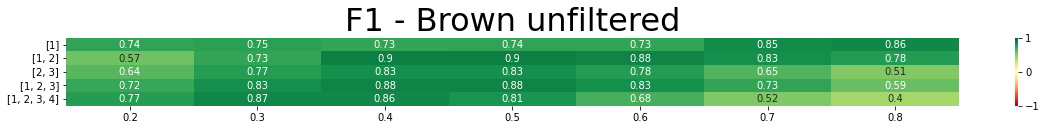

In [5]:
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append((evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown unfiltered') 

8643703


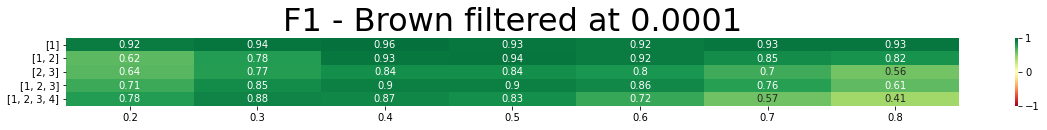

In [6]:
model_compress_with_loss(brown_chars.model,0.0001)
print(brown_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append((evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown filtered at 0.0001') 


8596119


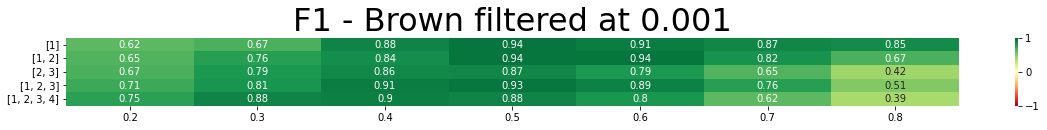

In [7]:
model_compress_with_loss(brown_chars.model,0.001)
print(brown_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append((evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown filtered at 0.001') 


8471014


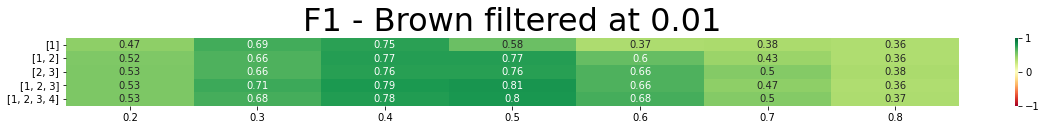

In [8]:
model_compress_with_loss(brown_chars.model,0.01)
print(brown_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append((evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown filtered at 0.01') 


In [9]:
del brown_chars

In [10]:
brown_grams = FreedomTokenizer(name='data/models/brown_nolines_grams_7a',max_n=7,mode='grams',debug=False)
print(brown_grams.count_params())


33960499


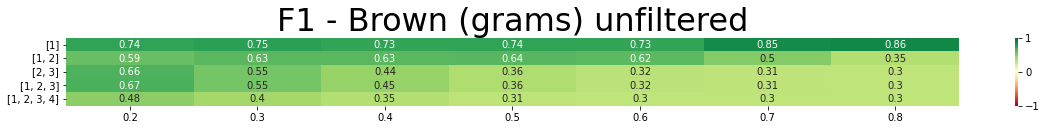

In [11]:
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(brown_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown (grams) unfiltered') 


In [12]:
del brown_grams

In [13]:
brown_chars = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
print(brown_chars.count_params())


10967135


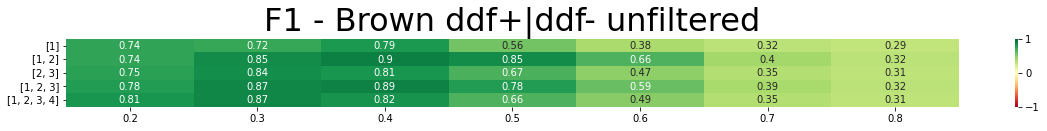

In [14]:
# just use one parameter 
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(brown_chars.model,test_texts,'ddf+|ddf-',None,nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown ddf+|ddf- unfiltered') 


8643703


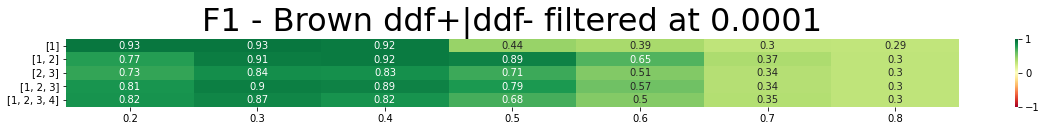

In [15]:
model_compress_with_loss(brown_chars.model,0.0001)
print(brown_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(brown_chars.model,test_texts,'ddf+|ddf-',None,nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown ddf+|ddf- filtered at 0.0001') 


8596119


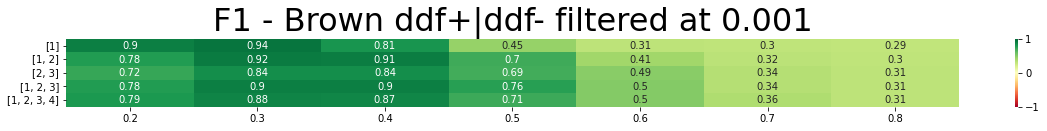

In [16]:
model_compress_with_loss(brown_chars.model,0.001)
print(brown_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(brown_chars.model,test_texts,'ddf+|ddf-',None,nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown ddf+|ddf- filtered at 0.001') 


In [17]:
del brown_chars

In [18]:
adult_chars = FreedomTokenizer(name='data/models/gutenberg_adult_chars_7a',max_n=7,mode='chars',debug=False)


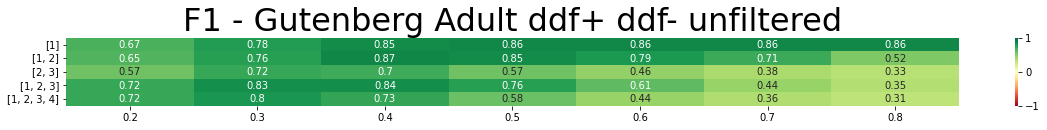

In [19]:
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult ddf+ ddf- unfiltered') 


31447648


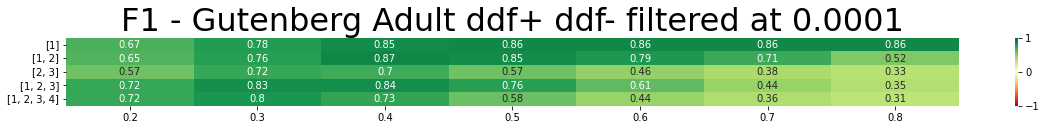

In [20]:
model_compress_with_loss(adult_chars.model,0.0001)
print(adult_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult ddf+ ddf- filtered at 0.0001') 


30751368


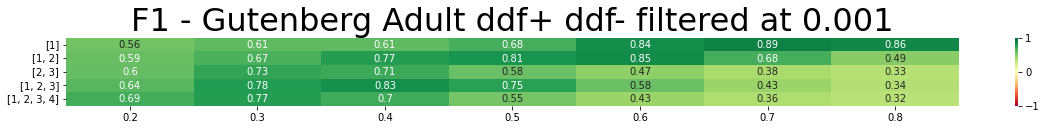

In [21]:
model_compress_with_loss(adult_chars.model,0.001)
print(adult_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult ddf+ ddf- filtered at 0.001') 


30718930


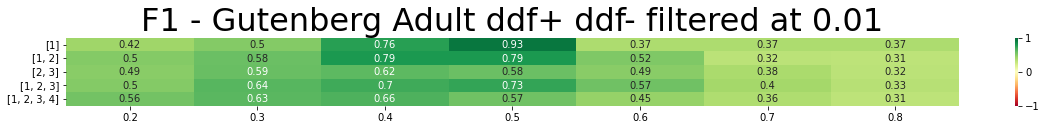

In [22]:
model_compress_with_loss(adult_chars.model,0.01)
print(adult_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult ddf+ ddf- filtered at 0.01') 


In [23]:
del adult_chars

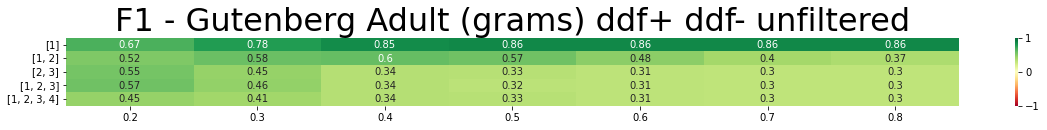

In [24]:
adult_grams = FreedomTokenizer(name='data/models/gutenberg_adult_grams_7a',max_n=7,mode='grams',debug=False)
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult (grams) ddf+ ddf- unfiltered') 


40143566


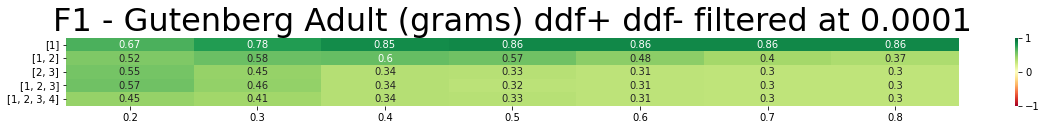

In [25]:
model_compress_with_loss(adult_grams.model,0.0001)
print(adult_grams.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult (grams) ddf+ ddf- filtered at 0.0001') 


39446341


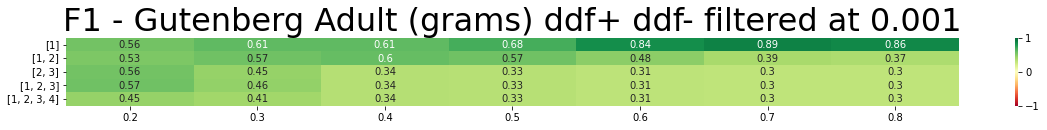

In [26]:
model_compress_with_loss(adult_grams.model,0.001)
print(adult_grams.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult (grams) ddf+ ddf- filtered at 0.001') 


In [27]:
del adult_grams


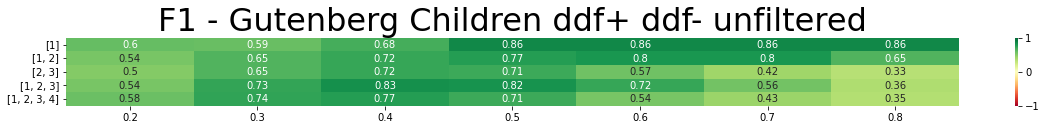

In [28]:
child_chars = FreedomTokenizer(name='data/models/gutenberg_child_chars_7a',max_n=7,mode='chars',debug=False)
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children ddf+ ddf- unfiltered') 


8561292


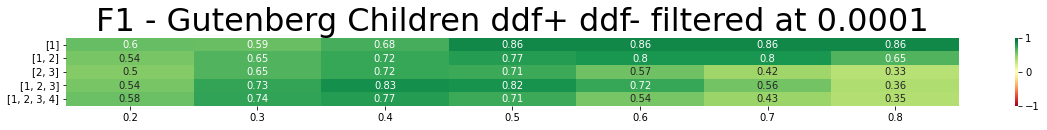

In [29]:
model_compress_with_loss(child_chars.model,0.0001)
print(child_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children ddf+ ddf- filtered at 0.0001') 


8467484


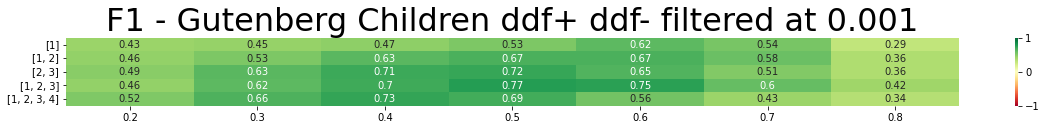

In [30]:
model_compress_with_loss(child_chars.model,0.001)
print(child_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children ddf+ ddf- filtered at 0.001') 


In [31]:
del child_chars

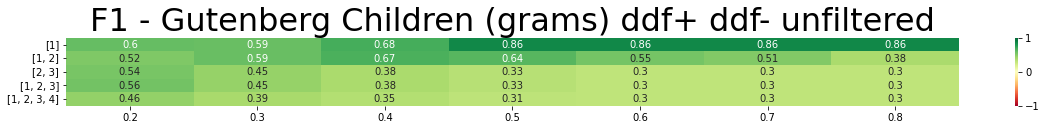

In [32]:
child_grams = FreedomTokenizer(name='data/models/gutenberg_child_grams_7a',max_n=7,mode='grams',debug=False)
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children (grams) ddf+ ddf- unfiltered') 


11276572


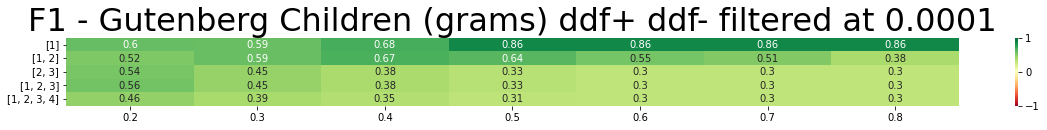

In [33]:
model_compress_with_loss(child_grams.model,0.0001)
print(child_grams.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children (grams) ddf+ ddf- filtered at 0.0001') 


11181927


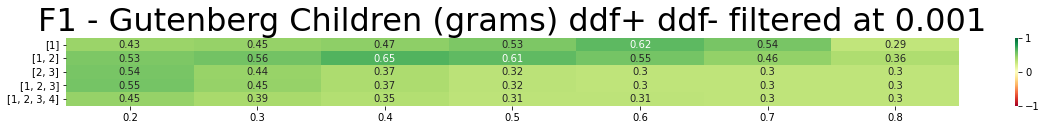

In [34]:
model_compress_with_loss(child_grams.model,0.001)
print(child_grams.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children (grams) ddf+ ddf- filtered at 0.001') 


In [35]:
del child_grams

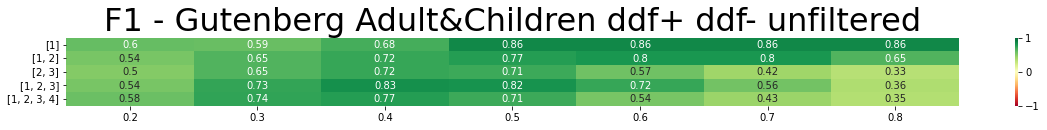

In [36]:
both_chars = FreedomTokenizer(name='data/models/gutenberg_both_chars_7a',max_n=7,mode='chars',debug=False)
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(both_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult&Children ddf+ ddf- unfiltered') 


32835638


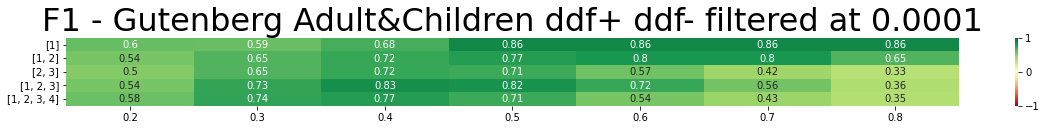

In [37]:
model_compress_with_loss(both_chars.model,0.0001)
print(both_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(both_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult&Children ddf+ ddf- filtered at 0.0001') 


32466920


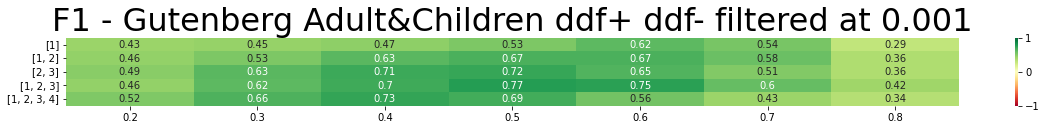

In [38]:
model_compress_with_loss(both_chars.model,0.001)
print(both_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(both_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult&Children ddf+ ddf- filtered at 0.001') 


In [39]:
del both_chars


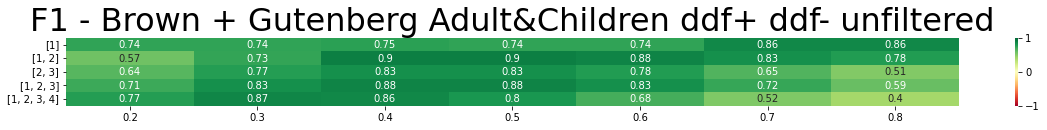

In [40]:
gutenberg_brown_chars = FreedomTokenizer(name='data/models/gutenberg_brown_chars_7a',max_n=7,mode='chars',debug=False)
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children ddf+ ddf- unfiltered') 


36917711


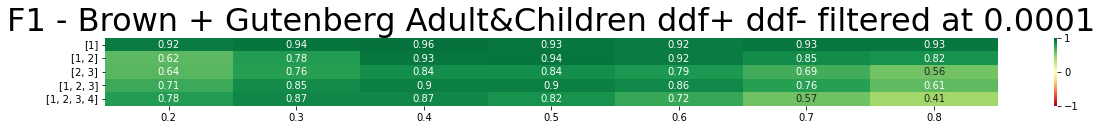

In [41]:
model_compress_with_loss(gutenberg_brown_chars.model,0.0001)
print(gutenberg_brown_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children ddf+ ddf- filtered at 0.0001') 


36866590


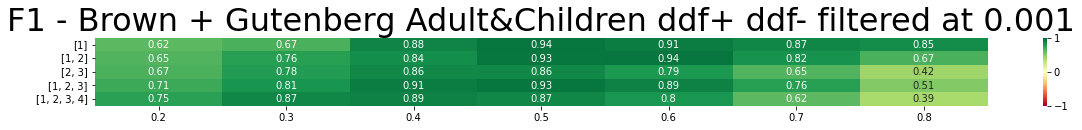

In [42]:
model_compress_with_loss(gutenberg_brown_chars.model,0.001)
print(gutenberg_brown_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children ddf+ ddf- filtered at 0.001') 


In [43]:
del gutenberg_brown_chars


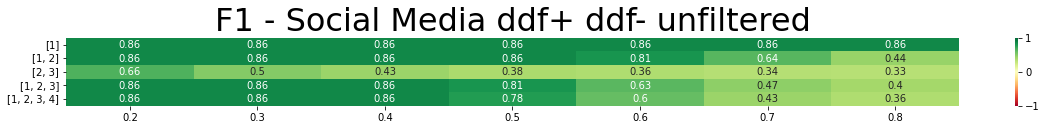

In [44]:
social_media_chars = FreedomTokenizer(name='data/models/social_media_chars_7a',max_n=7,mode='chars',debug=False)
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Social Media ddf+ ddf- unfiltered') 


39541983


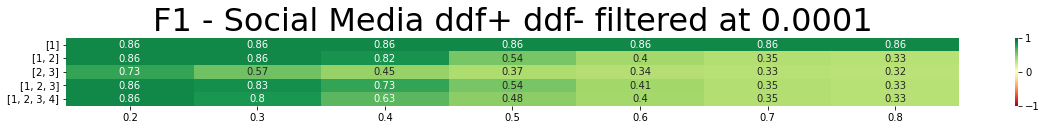

In [45]:
model_compress_with_loss(social_media_chars.model,0.0001)
print(social_media_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Social Media ddf+ ddf- filtered at 0.0001') 


39249041


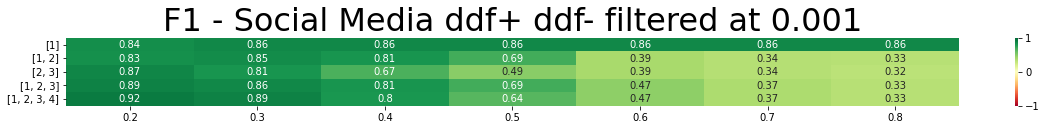

In [46]:
model_compress_with_loss(social_media_chars.model,0.001)
print(social_media_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Social Media ddf+ ddf- filtered at 0.001') 


In [47]:
del social_media_chars


91911837


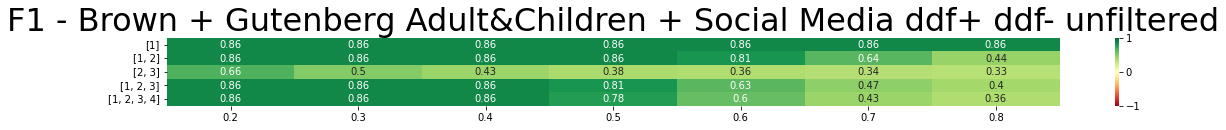

In [48]:
gutenberg_brown_social_media_chars = FreedomTokenizer(name='data/models/gutenberg_brown_social_media_chars_7a',max_n=7,mode='chars',debug=False)
print(gutenberg_brown_social_media_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children + Social Media ddf+ ddf- unfiltered') 


66916741


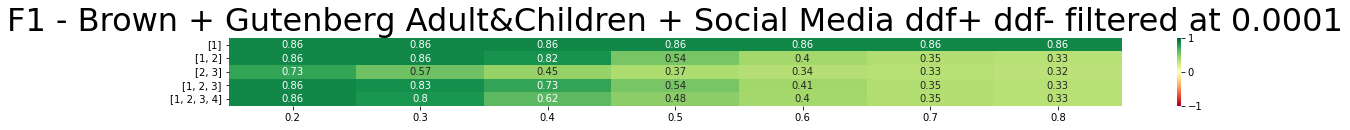

In [49]:
model_compress_with_loss(gutenberg_brown_social_media_chars.model,0.0001)
print(gutenberg_brown_social_media_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children + Social Media ddf+ ddf- filtered at 0.0001') 


66623666


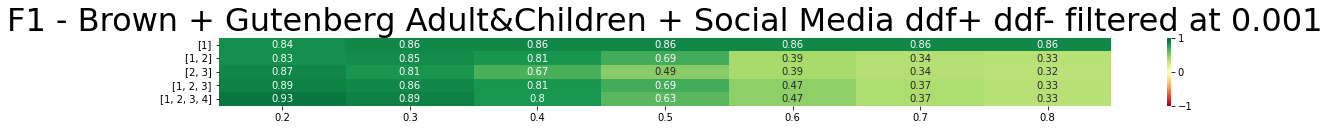

In [50]:
model_compress_with_loss(gutenberg_brown_social_media_chars.model,0.001)
print(gutenberg_brown_social_media_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children + Social Media ddf+ ddf- filtered at 0.001') 


65559937


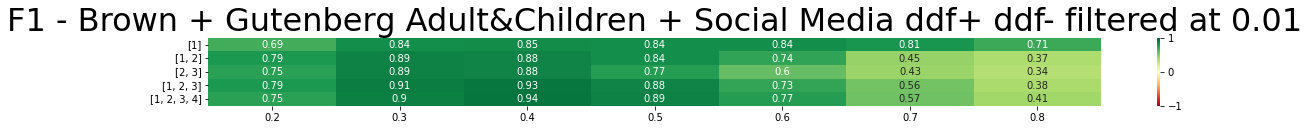

In [51]:
model_compress_with_loss(gutenberg_brown_social_media_chars.model,0.01)
print(gutenberg_brown_social_media_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children + Social Media ddf+ ddf- filtered at 0.01') 


61848203


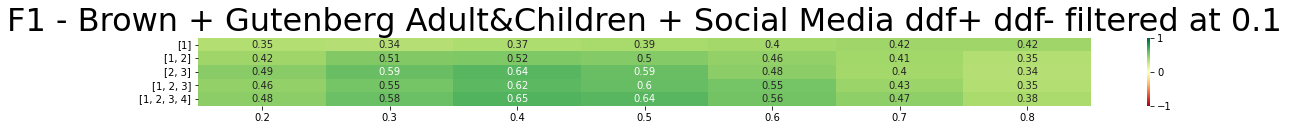

In [52]:
model_compress_with_loss(gutenberg_brown_social_media_chars.model,0.1)
print(gutenberg_brown_social_media_chars.count_params())
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children + Social Media ddf+ ddf- filtered at 0.1') 


In [53]:
del gutenberg_brown_social_media_chars
